In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Задание 1
Загрузите датасет из файла heart.csv со следующими полями (выборка об уровне сердечных заболеваний:
<ul>
<li>age : Возраст
<li>sex : Пол (1 = мужской; 0 = женский)
<li>cp : боль в груди (0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная).
<li>trestbps : кровяное давление в состоянии покоя.
<li>chol : холестерин сыворотки в мг/дл.
<li>fbs : уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
<li>restecg : результаты электрокардиографии в состоянии покоя
<li>thalach : максимальная частота сердечных сокращений
<li>exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
<li>oldpeak : депрессия ST, вызванная нагрузкой по сравнению с отдыхом.
<li>slope : Наклон пикового сегмента ST при нагрузке.
<li>ca : количество крупных сосудов, окрашенных флюороскопически (0–3).
<li>thal : (3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект)
<li>target : АГД - Диагностика заболеваний сердца (1 = да; 0 = нет)
</ul>
<ol>
<li>Выведите полученный датасет на экран
<li>Пользуясь загруженным датасетом, подтвердите или опровергните гипотезу, что доля населения, страдающего сердечными заболеваниями в городе N, превышает 46% (выведите "да", если это так, и "нет" в противном случае). Также выведите на экран полученное значение p-value, округлив его до 6 знаков после запятой.
</ol>    

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv", sep=',') # загружаем файл

print(f"Таблица 'heart':\n{df}")

Таблица 'heart':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1       

In [ ]:
target_1 = df['target'].sum() # считаем количество людей с болезнью сердца
all_people = df.shape[0] # находим общее количество человек в выборке

z_test, p_value = proportions_ztest(target_1 ,all_people , 0.46) # используем z-test

print(f'Превышает ли доля населения, страдающего сердечными заболеваниями, 46% от всего населения: {p_value <= 0.05}')
print(f'Значение p-value: {p_value:.6f}')

Превышает ли доля населения, страдающего сердечными заболеваниями, 46% от всего населения: True
Значение p-value: 0.003122


### Задание 2
Есть предположение, что среднее давление мужчин и женщин в состоянии покоя в городе N не отличается. Но некоторыми учеными была выдвинута гипотеза, что женщины имеют среднее давление выше чем мужины. Примите или опровергните альтернативную гипотезу. Для этого предварительно убедитесь, что генеральные совокупности имеют равные дисперсии и что обе выборки имеют распределение, близкое к нормальному (с помощью гистограммы). Выведите значение p-value, округлив до 6 знаков после запятой.


In [ ]:
m_df = df[df['sex'] == 1] # датафрэйм только с мужчинами
f_df = df[df['sex'] == 0] # датафрэйм только с женищинами

In [ ]:
equality_test = max(np.var(m_df['trestbps']), np.var(f_df['trestbps']))/min(np.var(m_df['trestbps']), np.var(f_df['trestbps'])) # проверка на раверство дисперсий
print(f'Дисперсии равны: {equality_test<4}')

Дисперсии равны: True


<Axes: >

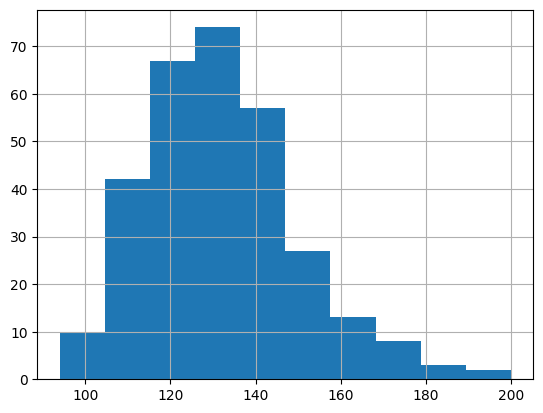

In [ ]:
df['trestbps'].hist() # выводим гистограмму, из которой свидно, что распределение нормальное

In [ ]:
t_test, p_value = stats.ttest_ind(a=m_df['trestbps'], b=f_df['trestbps'], equal_var=True) # t-test
print(f'Альтернативная гипотеза о том, что женщины имеют среднее давление выше, чем мужчины, подтверждается: {p_value <= 0.05}')
print(f'Значение p-value: {p_value:.6f}')

Альтернативная гипотеза о том, что женщины имеют среднее давление выше, чем мужчины, подтверждается: False
Значение p-value: 0.324683


### Задание 3
Считается, что средний уровень холестерина среди населения старше 60 лет, равен 250. Была выдвинута гипотеза, что это не так (что она не равна 250). Примите или опровергните эту гипотезу.Выведите значени p-value.

In [ ]:
chol_df = df[df['age'] > 60] #датафрэйм с людьми за 60

In [ ]:
t_test, p_value = stats.ttest_1samp (chol_df['chol'], 250) # t-test, двухвостый так как во второй гипотезы знак !=
print(f'Альтернативная гипотеза о том, что средний уровень холестерина среди населения старше 60 лет, не равен 250, подтверждается: {p_value <= 0.025}')
print(f'Значение p-value: {p_value}')

Альтернативная гипотеза о том, что средний уровень холестерина среди населения старше 60 лет, не равен 250, подтверждается: False
Значение p-value: 0.15876173897401408


### Задание 4
Вычислите доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений населения в городе N.

In [ ]:
trusting_interval = stats.norm.interval(confidence = 0.95, loc = np.mean(df['thalach']), scale = stats.sem(df['thalach']))
print(f'Доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений: {trusting_interval}')

Доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений: (147.0678125139342, 152.22591685900312)
